In [3]:
import os 
for dirname,_,filename in os.walk('/kaggle/input'):
    for filename in filename:
        print(os.path.join(dirname,filename))

/kaggle/input/crime-dataset-from-2020-to-present/Crime_Data_from_2020_to_Present.csv


In [4]:
import pandas as pd
file_path='/kaggle/input/crime-dataset-from-2020-to-present/Crime_Data_from_2020_to_Present.csv'
df=pd.read_csv(file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore")  


In [6]:
df.head()

,Crime_ID,Date_Report,DATE_Occure,TIME_Occure,AREA_Code,AREA_NAME,Police_deitrict,Crime1-2,Crime_Code,Crime_Code_Describtion,...,Crime_Type2,Crime_Type3,Crime_Type4,Street_Number,Direction,Street Name,Street Type,Cross Street,Latitude,Longitude
0,190326475,3/1/2020,3/1/2020,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,998.0,NaN,NaN,1900,S,LONGWOOD,AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020,2/8/2020,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,998.0,NaN,NaN,1000,S,FLOWER,ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020,11/4/2020,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,NaN,NaN,1400,W,37TH,ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023,3/10/2020,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,NaN,NaN,14000,NaN,RIVERSIDE,DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022,8/17/2020,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,NaN,NaN,NaN,1900,NaN,TRANSIENT,NaN,NaN,34.0944,-118.3277


In [7]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

print(df.columns.tolist())


['crime_id', 'date_report', 'date_occure', 'time_occure', 'area_code', 'area_name', 'police_deitrict', 'crime1-2', 'crime_code', 'crime_code_describtion', 'mocodes', 'victime_age', 'victime_sex', 'victime_descent', 'premis_code', 'premis_describtion', 'weapon_used_code', 'weapon_describtion', 'status_code', 'status_describtion', 'crime_type1', 'crime_type2', 'crime_type3', 'crime_type4', 'street_number', 'direction', 'street_name', 'street_type', 'cross_street', 'latitude', 'longitude']


In [8]:
df.describe().columns

Index(['crime_id', 'time_occure', 'area_code', 'police_deitrict', 'crime1-2',
       'crime_code', 'victime_age', 'premis_code', 'weapon_used_code',
       'crime_type1', 'crime_type2', 'crime_type3', 'crime_type4', 'latitude',
       'longitude'],
      dtype='object')

In [9]:
df['time_occure'] = df['time_occure'].astype(str).str.zfill(4)

df['time_occure'] = pd.to_datetime(df['time_occure'], format='%H%M', errors='coerce').dt.strftime('%H:%M')

print(df[['time_occure']].head(10))


  time_occure
0       21:30
1       18:00
2       17:00
3       20:37
4       12:00
5       23:00
6       09:00
7       11:10
8       14:00
9       12:20


In [10]:
import re

def clean_crime_description(desc):
    desc = re.sub(r'\(\d+[^\)]*\)', '', desc)

    desc = re.sub(r'[^a-zA-Z0-9\s&,\-]', '', desc)


    replacements = {
        'Dwoc': 'Driving Without Owner Consent',
        'Epo': 'Emergency Protective Order',
        'Ro': 'Restraining Order'
    }
    for k, v in replacements.items():
        desc = re.sub(r'\b' + re.escape(k) + r'\b', v, desc, flags=re.IGNORECASE)

    desc = re.sub(r'\s+', ' ', desc).strip()


    desc = desc.title()

    return desc

df['crime_code_describtion'] = df['crime_code_describtion'].apply(clean_crime_description)

print(df['crime_code_describtion'].unique())

['Vehicle - Stolen' 'Burglary From Vehicle' 'Bike - Stolen'
 'Shoplifting-Grand Theft 95001 & Over' 'Theft Of Identity'
 'Battery - Simple Assault'
 'Sodomysexual Contact Bw Penis Of One Pers To Anus Oth' 'Crm Agnst Chld'
 'Sex,Unlawfulinc Mutual Consent, Penetration W Frgn Obj'
 'Assault With Deadly Weapon, Aggravated Assault'
 'Letters, Lewd - Telephone Calls, Lewd'
 'Theft-Grand 95001 & Overexcpt,Guns,Fowl,Livestk,Prod'
 'Criminal Threats - No Weapon Displayed'
 'Embezzlement, Grand Theft 95001 & Over'
 'Theft From Motor Vehicle - Petty 950 & Under' 'Child Annoying'
 'Burglary' 'Contempt Of Court' 'Theft Plain - Petty 950 & Under'
 'Intimate Partner - Simple Assault' 'Lewd Conduct'
 'Theft Plain - Attempt' 'Theft From Motor Vehicle - Grand 95001 And Over'
 'Robbery' 'Bunco, Grand Theft' 'Battery With Sexual Contact'
 'Intimate Partner - Aggravated Assault' 'Oral Copulation'
 'Unauthorized Computer Access' 'Violation Of Restraining Order'
 'Shoplifting - Petty Theft 950 & Under'
 'Va

In [11]:
def clamp_age(age):
    try:
        age_num = float(age)
        if age_num < 1:
            return 1
        elif age_num > 100:
            return 100
        else:
            return age_num
    except:
        return age

df['victime_age'] = df['victime_age'].apply(clamp_age)
print(df['victime_age'])


0          1.0
1         47.0
2         19.0
3         19.0
4         28.0
          ... 
955334    36.0
955335    44.0
955336    80.0
955337     1.0
955338    70.0
Name: victime_age, Length: 955339, dtype: float64


In [12]:
df['victime_sex'] = df['victime_sex'].apply(lambda x: x if str(x).upper() in ['F', 'M'] else 'UNKNOWN')

null_count = df['victime_sex'].isnull().sum()
print(f"Number of null values: {null_count}")
print(df['victime_sex'])


Number of null values: 0
0               M
1               M
2         UNKNOWN
3               M
4               M
           ...   
955334          M
955335          F
955336          F
955337    UNKNOWN
955338          F
Name: victime_sex, Length: 955339, dtype: object


In [13]:
df['victime_descent'].fillna('UNKNOWN', inplace=True)
print("Number of null values:", df['victime_descent'].isnull().sum())

Number of null values: 0


In [14]:
df['premis_describtion'] = df['premis_describtion'].str.title()

df['premis_describtion'] = df['premis_describtion'].str.replace(r'\(.*?\)', '', regex=True)

df['premis_describtion'] = df['premis_describtion'].apply(
    lambda x: re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', str(x))
)

df['premis_describtion'] = df['premis_describtion'].str.strip()
df['premis_describtion'] = df['premis_describtion'].str.replace(r'\s+', ' ', regex=True)

print(df['premis_describtion'].unique())

['Street' 'Bus Stop/Layover' 'Multi-Unit Dwelling' 'Clothing Store'
 'Sidewalk' 'Single Family Dwelling' 'Cell Phone Store' 'Cyberspace'
 'Website' 'Other Business' 'Parking Lot' 'Other Residence'
 'Automated Teller Machine' 'Department Store' 'Public Storage'
 'Garage/Carport' 'Equipment Rental' 'Office Building/Office'
 'Police Facility' 'Mta Bus' 'Specialty School/Other' 'Bank'
 'Government Facility' 'Skating Rink*' 'Bus Stop' 'Junior High School'
 'Other/Outside' 'Alley' 'Vehicle, Passenger/Truck'
 'Abandoned Building Abandoned House' 'Transportation Facility' 'Motel'
 'Hospital' 'Bus, School, Church' 'Other Premise' 'Storage Shed'
 'Other Store' 'High School' 'Mail Box' 'Hotel' 'Night Club'
 'Finance Company' 'Park/Playground' 'Coliseum' 'Health Spa/Gym'
 'Church/Chapel' 'Driveway' 'Underpass/Bridge*'
 'Banking Inside Market-Store *' 'Telecommunication Facility/Location'
 'Laundromat' 'Porch, Residential' 'Condominium/Townhouse' 'Group Home'
 'Pay Phone' 'Nail Salon' 'Train Tracks

In [15]:
df['weapon_used_code'] = df['weapon_used_code'].replace(r'^\s*$', 'UNKNOWN', regex=True)
df['weapon_used_code'] = df['weapon_used_code'].fillna('UNKNOWN')

empty_values = df[df['weapon_used_code'].isnull() | (df['weapon_used_code'].str.strip() == '')]['weapon_used_code']

print(df['weapon_used_code'].value_counts().head(10))



weapon_used_code
UNKNOWN    630320
400.0      174057
500.0       35496
511.0       23755
102.0       20012
109.0        7222
200.0        6812
106.0        6543
207.0        5857
512.0        3725
Name: count, dtype: int64


In [16]:
valid_direction = ['N', 'S', 'E', 'W', 'NE', 'NW', 'SE', 'SW']

valid_street_type = ['ST', 'AV', 'RD', 'DR', 'LN', 'BLVD', 'CT', 'PL', 'CIR', 'TRL', 'TER', 'HWY', 'WAY', 'PKWY', 'PLZ']

def is_number(val):
    return str(val).isdigit()

def is_alpha(val):
    return str(val).isalpha()

def is_street_type(val):
    return str(val).upper() in valid_street_type

def is_direction(val):
    return str(val).upper() in valid_direction

for idx, row in df.iterrows():
    # Street Number
    if pd.notna(row['street_number']) and not is_number(row['street_number']):
        val = row['street_number']
        if is_direction(val):
            df.at[idx, 'direction'] = val
            df.at[idx, 'street_number'] = None
        elif is_street_type(val):
            df.at[idx, 'street_type'] = val
            df.at[idx, 'street_number'] = None
        else:
            df.at[idx, 'street_name'] = val
            df.at[idx, 'street_number'] = None

    # Direction
    if pd.notna(row['direction']) and not is_direction(row['direction']):
        val = row['direction']
        if is_number(val):
            df.at[idx, 'street_number'] = val
            df.at[idx, 'direction'] = None
        elif is_street_type(val):
            df.at[idx, 'street_type'] = val
            df.at[idx, 'direction'] = None
        else:
            df.at[idx, 'street_name'] = val
            df.at[idx, 'direction'] = None

    # Street Type
    if pd.notna(row['street_type']) and not is_street_type(row['street_type']):
        val = row['street_type']
        if is_number(val):
            df.at[idx, 'street_number'] = val
            df.at[idx, 'street_type'] = None
        elif is_direction(val):
            df.at[idx, 'direction'] = val
            df.at[idx, 'street_type'] = None
        else:
            df.at[idx, 'street_name'] = val
            df.at[idx, 'street_type'] = None

    # Street Name
    if pd.notna(row['street_name']) and is_number(row['street_name']):
        val = row['street_name']
        df.at[idx, 'street_number'] = val
        df.at[idx, 'street_name'] = None


In [17]:
for idx, val in df['street_name'].dropna().items():
    val_str = str(val).strip().upper()
    if val_str.isdigit():
        df.at[idx, 'street_number'] = val_str
        df.at[idx, 'street_name'] = None
    elif len(val_str) == 1 and val_str in valid_direction:
        df.at[idx, 'direction'] = val_str
        df.at[idx, 'street_name'] = None
    elif len(val_str) == 2 and val_str in valid_street_type:
        df.at[idx, 'street_type'] = val_str
        df.at[idx, 'street_name'] = None

df['street_number'] = df['street_number'].fillna(0)
df['direction'] = df['direction'].fillna('UNKNOWN')
df['street_type'] = df['street_type'].fillna('UNKNOWN')
df['street_name'] = df['street_name'].fillna('UNKNOWN')


print(df[['street_number', 'direction', 'street_type', 'street_name']])

       street_number direction street_type street_name
0               1900         S          AV    LONGWOOD
1               1000         S          ST      FLOWER
2               1400         W          ST        37TH
3              14000   UNKNOWN          DR   RIVERSIDE
4               1900   UNKNOWN     UNKNOWN   TRANSIENT
...              ...       ...         ...         ...
955334          8700   UNKNOWN     UNKNOWN  LANKERSHIM
955335         22700   UNKNOWN     UNKNOWN        NAPA
955336             0   UNKNOWN     UNKNOWN          BL
955337          1300         W     UNKNOWN          BL
955338             0   UNKNOWN          ST      FLOWER

[955339 rows x 4 columns]


In [18]:
print(df['street_number'].unique())

df['street_number'] = pd.to_numeric(df['street_number'], errors='coerce')

print(df['street_number'].dtype)

['1900' '1000' '1400' '14000' '9900' '1100' '2500' '1300' '9000' '100'
 '13400' '900' 0 '4200' '400' '4000' '4500' '5200' '800' '16700' '8500'
 '1700' '200' '21000' '2800' '7700' '1600' '1200' '6200' '7800' '8700'
 '5700' '3400' '17900' '700' '2700' '15200' '14500' '500' '5000' '2300'
 '11100' '6700' '7200' '3300' '17100' '4900' '2600' '9300' '17400' '14600'
 '18600' '7400' '15400' '12600' '8300' '10800' '12700' '5900' '1500'
 '6400' '13600' '10900' '2200' '5500' '6500' '6000' '7500' '5100' '3600'
 '18400' '44' '5300' '6600' '4600' '8600' '4800' '8100' '11300' '7900'
 '9700' '2000' '14700' '12100' '6800' '600' '10400' '300' '9400' '6300'
 '8800' '17600' '4700' '19200' '3200' '3100' '10200' '10300' '32' '11700'
 '12300' '3500' '11000' '21600' '6900' '10500' '2400' '8900' '12800'
 '15300' '4100' '12900' '15100' '3800' '55' '5800' '20400' '20600' '8400'
 '1800' '19100' '3000' '19500' '7300' '11800' '11500' '3900' '2100'
 '14200' '25400' '9600' '16600' '16100' '22100' '18300' '2900' '7600'

In [19]:
mode_premis = df['premis_code'].mode()
if not mode_premis.empty:
    df['premis_code'] = df['premis_code'].fillna(mode_premis[0])

mode_crime_type = df['crime_type1'].mode()
if not mode_crime_type.empty:
    df['crime_type1'] = df['crime_type1'].fillna(mode_crime_type[0])

mode_mocodes = df['mocodes'].mode()
if not mode_mocodes.empty:
    df['mocodes'] = df['mocodes'].fillna(mode_mocodes[0])

mode_status = df['status_code'].mode()
if not mode_status.empty:
    df['status_code'] = df['status_code'].fillna(mode_status[0])

In [20]:
Q1_lat = df['latitude'].quantile(0.25)
Q3_lat = df['latitude'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
lower_bound_lat = Q1_lat - 1.5 * IQR_lat
upper_bound_lat = Q3_lat + 1.5 * IQR_lat

Q1_lon = df['longitude'].quantile(0.25)
Q3_lon = df['longitude'].quantile(0.75)
IQR_lon = Q3_lon - Q1_lon
lower_bound_lon = Q1_lon - 1.5 * IQR_lon
upper_bound_lon = Q3_lon + 1.5 * IQR_lon

df = df[(df['latitude'] >= lower_bound_lat) & (df['latitude'] <= upper_bound_lat) &
        (df['longitude'] >= lower_bound_lon) & (df['longitude'] <= upper_bound_lon)]



In [21]:
threshold = 0.5

cols_to_drop = []

for col in df.columns:
    null_ratio = df[col].isnull().mean()
    if null_ratio > threshold:
        cols_to_drop.append(col)
        print(f"Dropping column '{col}' with {null_ratio*100:.2f}% null values")

df.drop(columns=cols_to_drop, inplace=True)

Dropping column 'weapon_describtion' with 66.02% null values
Dropping column 'crime_type2' with 92.86% null values
Dropping column 'crime_type3' with 99.76% null values
Dropping column 'crime_type4' with 99.99% null values
Dropping column 'cross_street' with 84.38% null values


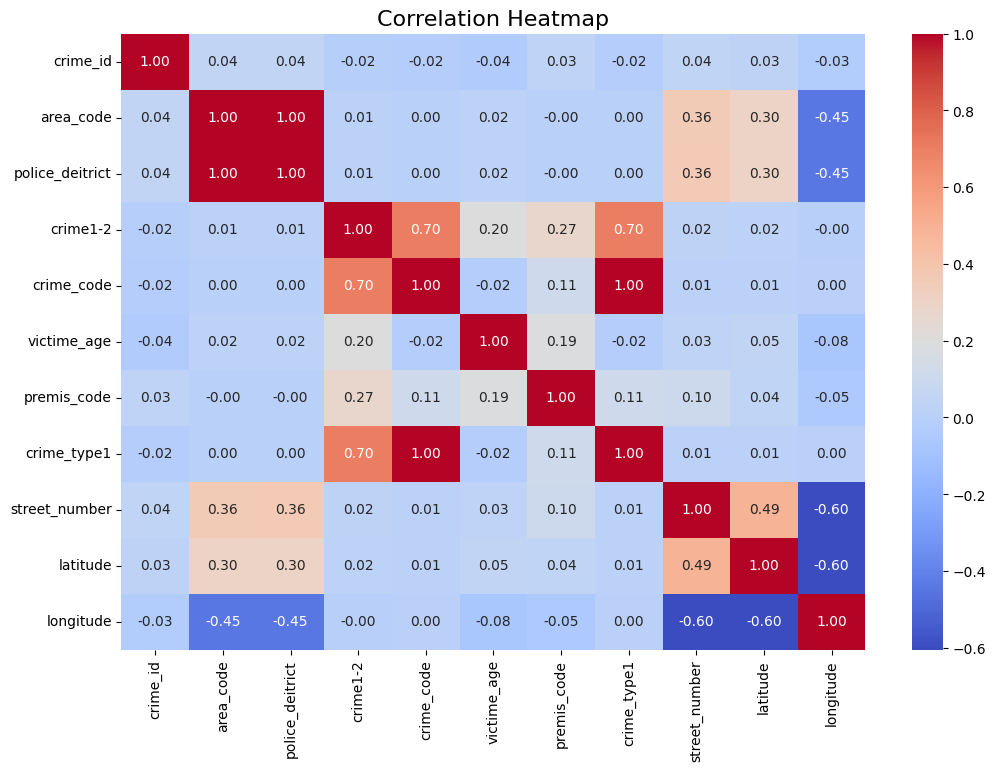

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [23]:
print(df.duplicated().sum())

0


In [24]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [25]:
df.describe()

,crime_id,area_code,police_deitrict,crime1-2,crime_code,victime_age,premis_code,crime_type1,street_number,latitude,longitude
count,9.257800e+05,925780.000000,925780.000000,925780.000000,925780.000000,925780.000000,925780.000000,925780.000000,925780.000000,925780.000000,925780.000000
mean,2.191912e+08,10.886647,1135.020469,1.405745,499.402019,29.654696,306.460767,499.147870,4964.079865,34.083603,-118.356847
std,1.261152e+07,6.108659,610.986646,0.491036,206.500237,21.530189,218.077481,206.288447,5789.205943,0.097954,0.105224
min,8.170000e+02,1.000000,101.000000,1.000000,110.000000,1.000000,101.000000,110.000000,0.000000,33.788900,-118.665200
25%,2.106071e+08,6.000000,645.000000,1.000000,331.000000,1.000000,101.000000,331.000000,500.000000,34.021300,-118.433900
50%,2.207183e+08,11.000000,1171.000000,1.000000,442.000000,30.000000,203.000000,442.000000,2600.000000,34.061500,-118.328200
75%,2.308085e+08,16.000000,1645.000000,2.000000,626.000000,45.000000,501.000000,626.000000,7900.000000,34.167500,-118.274300
max,2.499187e+08,21.000000,2199.000000,2.000000,956.000000,100.000000,976.000000,956.000000,881506.000000,34.334300,-118.155400


In [26]:
df.dtypes

crime_id                    int64
date_report                object
date_occure                object
time_occure                object
area_code                   int64
area_name                  object
police_deitrict             int64
crime1-2                    int64
crime_code                  int64
crime_code_describtion     object
mocodes                    object
victime_age               float64
victime_sex                object
victime_descent            object
premis_code               float64
premis_describtion         object
weapon_used_code           object
status_code                object
status_describtion         object
crime_type1               float64
street_number               int64
direction                  object
street_name                object
street_type                object
latitude                  float64
longitude                 float64
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925780 entries, 0 to 955338
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   crime_id                925780 non-null  int64  
 1   date_report             925780 non-null  object 
 2   date_occure             925780 non-null  object 
 3   time_occure             925780 non-null  object 
 4   area_code               925780 non-null  int64  
 5   area_name               925780 non-null  object 
 6   police_deitrict         925780 non-null  int64  
 7   crime1-2                925780 non-null  int64  
 8   crime_code              925780 non-null  int64  
 9   crime_code_describtion  925780 non-null  object 
 10  mocodes                 925780 non-null  object 
 11  victime_age             925780 non-null  float64
 12  victime_sex             925780 non-null  object 
 13  victime_descent         925780 non-null  object 
 14  premis_code             9

In [28]:
df.shape

(925780, 26)

In [29]:
df['victim_sex_crime_code'] = df['victime_sex'].astype(str) + '_' + df['crime_code'].astype(str)


In [30]:
df['date_report'] = pd.to_datetime(df['date_report'], errors='coerce')

df['report_year'] = df['date_report'].dt.year
df['report_month'] = df['date_report'].dt.month
df['report_day'] = df['date_report'].dt.day


In [31]:
df['date_occure'] = pd.to_datetime(df['date_occure'], errors='coerce')
df['year'] = df['date_occure'].dt.year
df['month'] = df['date_occure'].dt.month
df['weekday'] = df['date_occure'].dt.weekday


In [32]:
df['report_delay_days'] = (df['date_report'] - df['date_occure']).dt.days

In [33]:
print(df.columns.tolist())


['crime_id', 'date_report', 'date_occure', 'time_occure', 'area_code', 'area_name', 'police_deitrict', 'crime1-2', 'crime_code', 'crime_code_describtion', 'mocodes', 'victime_age', 'victime_sex', 'victime_descent', 'premis_code', 'premis_describtion', 'weapon_used_code', 'status_code', 'status_describtion', 'crime_type1', 'street_number', 'direction', 'street_name', 'street_type', 'latitude', 'longitude', 'victim_sex_crime_code', 'report_year', 'report_month', 'report_day', 'year', 'month', 'weekday', 'report_delay_days']


In [34]:
df_copy = df.copy(deep=True)


In [36]:
df_copy = df_copy.drop(columns=['date_occure', 'date_report'], errors='ignore')

In [37]:
from sklearn.preprocessing import LabelEncoder

label_cols = [
    'victime_sex', 'victime_descent', 'victim_sex_crime_code',
    'crime_code_describtion', 'status_code'
]
le = LabelEncoder()

for col in label_cols:
    df_copy[col] = le.fit_transform(df_copy[col].astype(str))
print(df_copy[label_cols].head())

   victime_sex  victime_descent  victim_sex_crime_code  \
0            1               12                    187   
1            1               12                    147   
2            2               19                    313   
3            1               12                    150   
4            1                7                    158   

   crime_code_describtion  status_code  
0                     132            0  
1                      21            3  
2                      11            3  
3                     105            3  
4                     115            3  


In [38]:
from sklearn.preprocessing import OneHotEncoder

one_hot_cols = ['area_name']

df_copy = pd.get_dummies(df_copy, columns=one_hot_cols, drop_first=False)

print(df_copy.head())

    crime_id time_occure  area_code  police_deitrict  crime1-2  crime_code  \
0  190326475       21:30          7              784         1         510   
1  200106753       18:00          1              182         1         330   
2  200320258       17:00          3              356         1         480   
3  200907217       20:37          9              964         1         343   
4  220614831       12:00          6              666         2         354   

   crime_code_describtion              mocodes  victime_age  victime_sex  ...  \
0                     132                  344          1.0            1  ...   
1                      21       1822 1402 0344         47.0            1  ...   
2                      11            0344 1251         19.0            2  ...   
3                     105            0325 1501         19.0            1  ...   
4                     115  1822 1501 0930 2004         28.0            1  ...   

   area_name_Olympic  area_name_Pacific area

In [43]:
from sklearn.preprocessing import LabelEncoder


df_model = df_copy.copy()

cat_cols = df_model.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

print(df_model.head())


    crime_id  time_occure  area_code  police_deitrict  crime1-2  crime_code  \
0  190326475         1289          7              784         1         510   
1  200106753         1079          1              182         1         330   
2  200320258         1019          3              356         1         480   
3  200907217         1236          9              964         1         343   
4  220614831          719          6              666         2         354   

   crime_code_describtion  mocodes  victime_age  victime_sex  ...  \
0                     132   297264          1.0            1  ...   
1                      21   257482         47.0            1  ...   
2                      11    46468         19.0            2  ...   
3                     105    14556         19.0            1  ...   
4                     115   258988         28.0            1  ...   

   area_name_Pacific  area_name_Rampart  area_name_Southeast  \
0              False              False       

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [41]:
from sklearn.cluster import KMeans

coords = df_copy[['latitude', 'longitude']]

coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=10, random_state=42)
df_copy['location_cluster'] = kmeans.fit_predict(coords_scaled)
print(df_copy[['latitude', 'longitude', 'location_cluster']].head(10))

   latitude  longitude  location_cluster
0   34.0375  -118.3506                 2
1   34.0444  -118.2628                 4
2   34.0210  -118.3002                 4
3   34.1576  -118.4387                 1
4   34.0944  -118.3277                 2
5   33.9467  -118.2463                 0
6   34.0415  -118.2620                 4
7   34.0335  -118.3537                 2
8   33.9911  -118.2521                 0
9   34.2336  -118.4535                 5


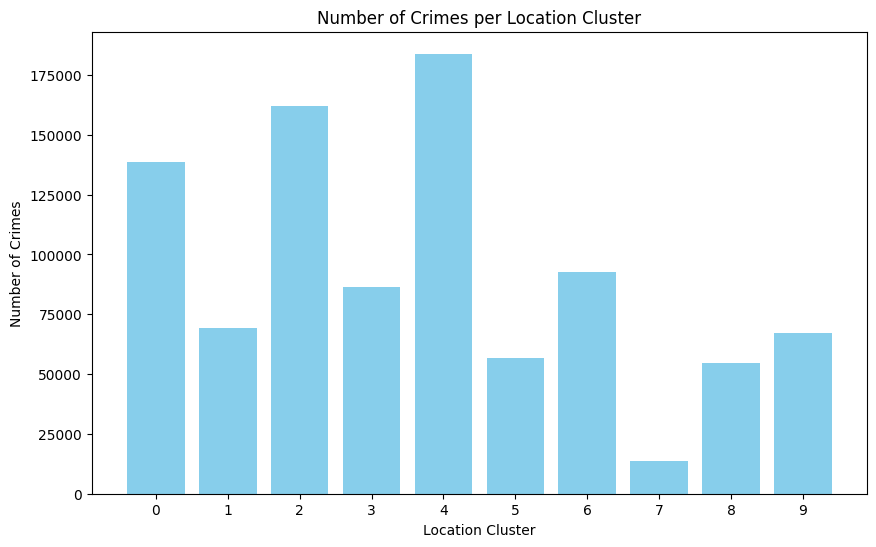

In [42]:
import matplotlib.pyplot as plt

cluster_counts = df_copy['location_cluster'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Location Cluster')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Location Cluster')
plt.xticks(cluster_counts.index)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df_model.drop(columns=['status_describtion'])  
y = df_model['status_describtion']  




In [46]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
rf_model = RandomForestClassifier(
    n_estimators=50,       
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9264728121151894

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16046
           1       0.68      0.96      0.80     20312
           2       0.99      0.91      0.95    147855
           3       0.13      0.90      0.23       590
           4       0.77      0.96      0.85       351
           5       0.00      0.00      0.00         2

    accuracy                           0.93    185156
   macro avg       0.60      0.79      0.64    185156
weighted avg       0.96      0.93      0.94    185156



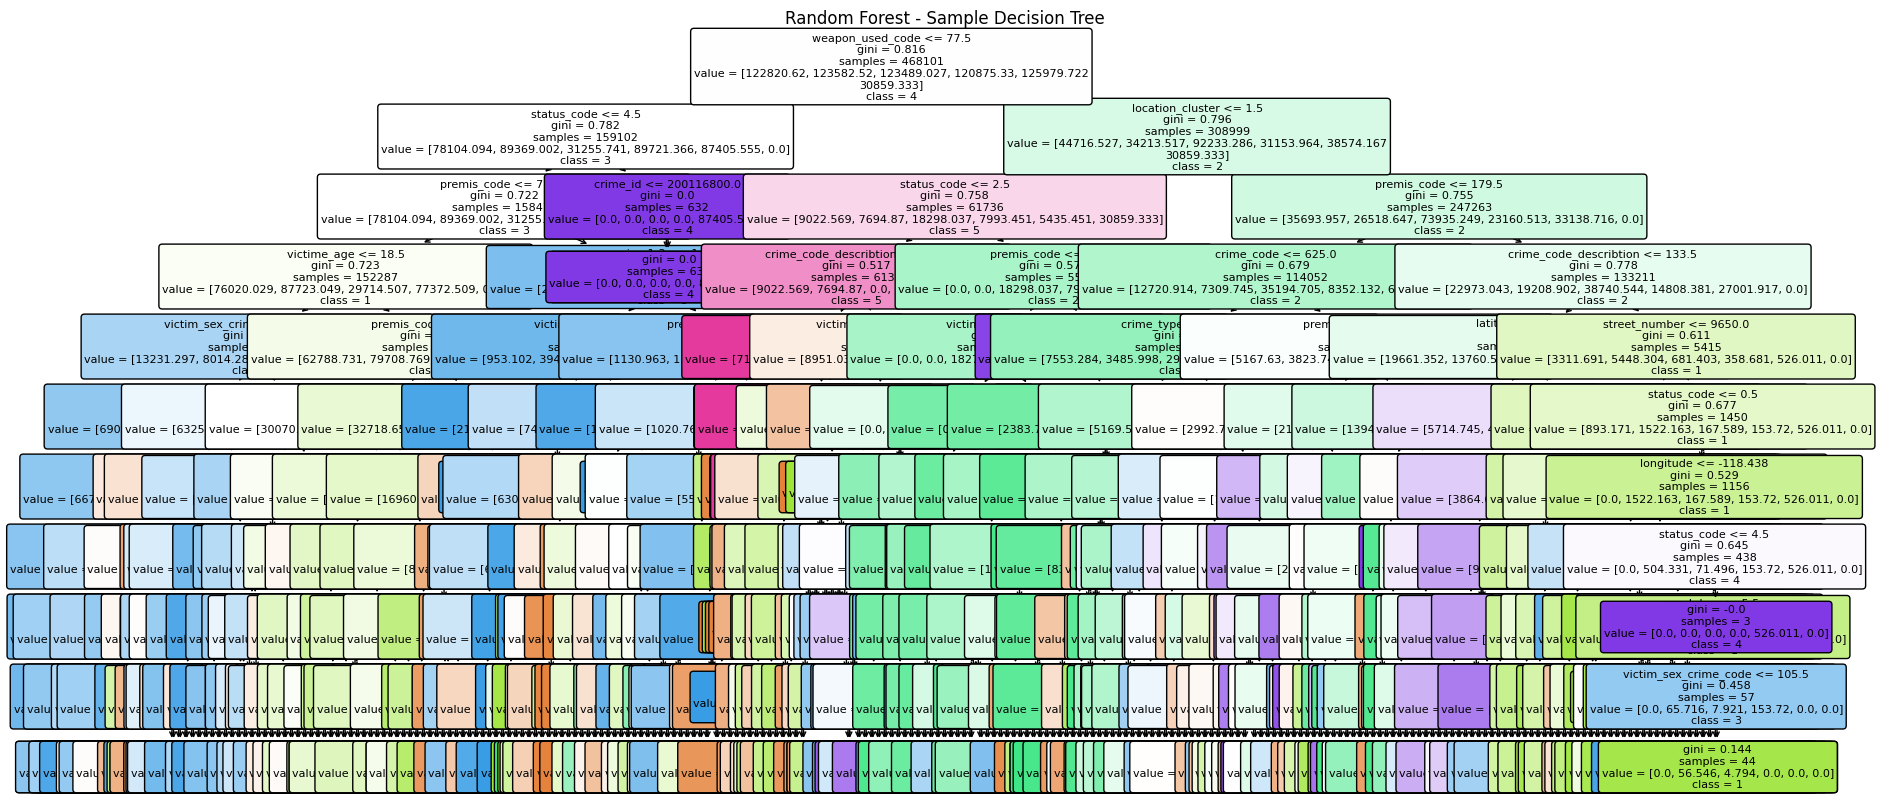

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

estimator = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=X.columns,
          class_names=[str(c) for c in rf_model.classes_],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Random Forest - Sample Decision Tree")
plt.show()


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [51]:
target_col = 'crime_type1'

X = df_model.drop(columns=[target_col])
y = LabelEncoder().fit_transform(df_model[target_col].astype(str))

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [54]:

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8367538724102919
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       282
           1       0.00      0.00      0.00         2
           2       0.97      0.84      0.90       708
           3       0.33      0.78      0.46        67
           4       1.00      0.97      0.98      6209
           5       0.76      0.94      0.84       958
           6       0.99      0.88      0.94     10283
           7       0.14      0.89      0.25       180
           8       0.71      0.99      0.83       127
           9       1.00      0.99      1.00      2439
          10       0.99      0.98      0.98       205
          11       0.43      0.90      0.58        89
          12       0.77      0.89      0.83       309
          13       0.90      0.76      0.82     11340
          14       0.19      0.78      0.30       778
          15       0.89      0.82      0.85     11588
          16       0.99      0.95      0.97      666

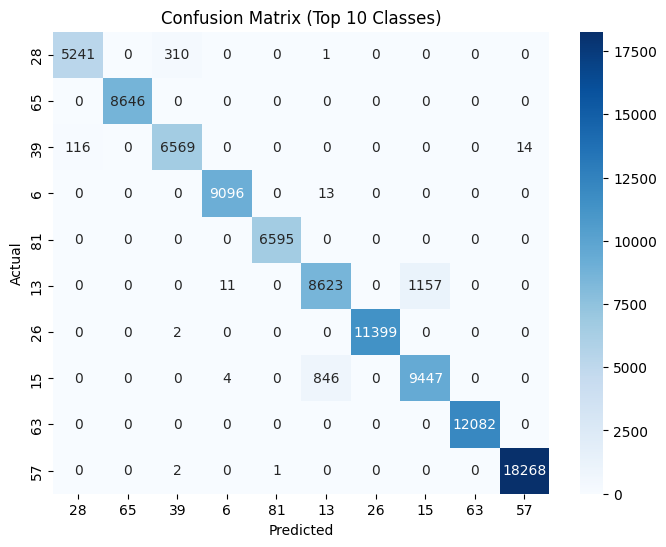

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

totals = cm.sum(axis=1)

top_classes = np.argsort(totals)[-10:]  

cm_small = cm[np.ix_(top_classes, top_classes)]

plt.figure(figsize=(8,6))
sns.heatmap(cm_small, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_classes,
            yticklabels=top_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Top 10 Classes)')
plt.show()
